## The prediction of clients churn##

## Purpose of the study ##
**Preparation and processing of source data and the follow-up model building based on Random Forest algorithm. Source data is from Kaggle.
Work contains explanatory comments.**

<font color='grey'>

## Прогноз клиентского оттока ##

## Цель работы ##
**Обработка и подготовка исходных данных и последующее построение обучающей модели на основе алгоритма Random Forest.  Данные взяты с Kaggle.
Скрипт уже содержит пояснительные комментарии.**</font> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

In [2]:
data = pd.read_csv('churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data = data.dropna()

In [5]:
data.shape

(10000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Data is without empty cells. The dataset consisits of 10 thousands strings and 14 columns.

- CustomerId -  the random identity number of client
- Surname 
- CreditScore - the tendency to loan. The indicator is calculated by bank side, and we don't know how exactly but it's not a probabilistic value because indicator can be more than 100. 
- Geography - there are only 3 countries and that will be later marked bacause contries can influence on churn (for example, economical issues, unemployment and etc. increase loan rate)
- Gender
- Age
- Tenure - client lifetime
- Balance - the same story than the CreditScore. The higher indicator, the lower churn probability at first sight.
- NumOfProducts - number of products by client
- HasCrCard - the credit card existance. 1 - yes, 0 - no.
- IsActiveMember  - client activity. It's complicated to understand by database what this indicator means because client with 3 product and high balance can be marked as non-activity. It's possible that they count only transaction activity.
- EstimatedSalary 
- Exited - churn (1 - yes, 0 - no)

<font color='grey'>
    
С данными повезло, нет пустых ячеек, что встречается крайне редко. Датасет состоит из 10 тысяч строк и 14 столбцов. По порядку
- CustomerId - рандомный идентификатор, присваиваемый клиенту, естесственно не имеет никакого значения на принимаемое решение со стороны клиента. 
- Surname - Имя.
- CreditScore - склонность к кредиту. Показатель рассчитывается на стороне банка, как именно - непонятно, но это явно не вероятностное значение, так как показатели превышают 100. Логично предпложить, что человек с большей склонностью к кредиту дольше будет клиентом банка.
- Geography - регион проживания, стран всего три. В будущем промаркирую их, потому что они могут влиять на отток клиентов (например, экономический кризис в стране, безработица и тд повышают кол-во займов).
- Gender - пол, также есть смысл промаркировать.
- Age - возраст.
- Tenure - срок жизни клиента.
- Balance - остаток средств на счете клиента. Та же история, что и со склонностью к кредитам, чем выше цифра, тем меньше вероятность оттока (на первый взгляд).
- NumOfProducts - кол-во банковских продуктов у клиента.
- HasCrCard - есть ли кредитная карта. 1 - есть, 0 - нет.
- IsActiveMember - активность клиента. По данным очень сложно понять, что именно это значит, потому что клиент с тремя продуктами и хорошим остатком на счете моожет быть промаркирован как неактивный. Вполне возможно, что для этого маркера берется период (например месяц), в течение которого должна быть какая-либо активность (поступление денежных средств, транзакции по картам и тд).
- EstimatedSalary - зарплата клиента.
- Exited - отток (1 - да, 0 - нет).
    </font> 

In [7]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

I want to replace quality indicators on numbers. That will address the following columns: Geography, Gender.

<font color='grey'>
Заменю значения качественных показателей на числа. Затронет это следующие столбцы: Geography, Gender.
 </font> 

In [8]:
data.loc[data.Geography == 'France', 'Geography'] = 0
data.loc[data.Geography == 'Spain', 'Geography'] = 1
data.loc[data.Geography == 'Germany', 'Geography'] = 2

data.loc[data.Gender == 'Female', 'Gender'] = 0
data.loc[data.Gender == 'Male', 'Gender'] = 1

In [9]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0


**Key indicators**

<font color='grey'>

**Основные показатели**
     </font> 

In [10]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


I'm going to exammine the next columns in detail.

<font color='grey'>
Проанализирую следующие столбцы подробнее.
     </font> 

**CreditScore**

Owing to average and median I'm leaning towards normal distribution.

<font color='grey'>
Уже по данным медианы и среднего я склоняюсь к нормальному распределению, но все же проверю.
     </font> 

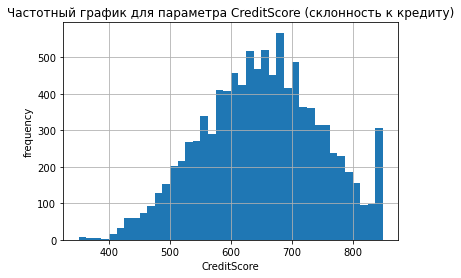

In [11]:
ax = data.CreditScore.hist(bins=40)

ax.set_xlabel('CreditScore')
ax.set_ylabel('frequency')
ax.set_title('Частотный график для параметра CreditScore (склонность к кредиту)')
plt.grid(True)
plt.show()

Almost 3000 of clients have the CreditScore about 850, and that prevents talking about normal distribution.
<font color='grey'>
    
Что ж, почти 300 клиентов имеют склонность равную 850, что не дает мне говорить о нормальном распределении.
     </font> 

**Age**

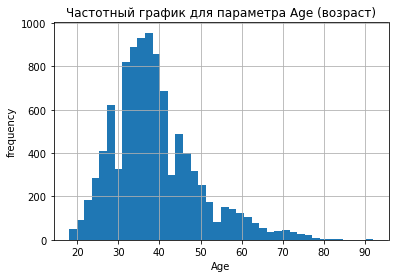

In [12]:
ax = data.Age.hist(bins=40)

ax.set_xlabel('Age')
ax.set_ylabel('frequency')
ax.set_title('Частотный график для параметра Age (возраст)')
plt.grid(True)
plt.show()

**Tenure**

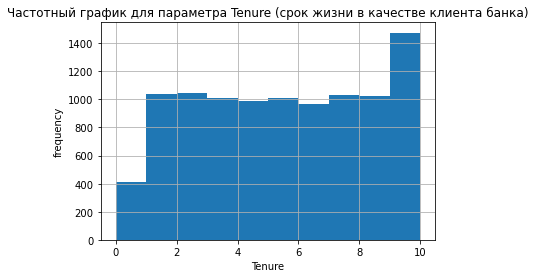

In [13]:
ax = data.Tenure.hist(bins=10)

ax.set_xlabel('Tenure')
ax.set_ylabel('frequency')
ax.set_title('Частотный график для параметра Tenure (срок жизни в качестве клиента банка)')
plt.grid(True)
plt.show()

**Balance**

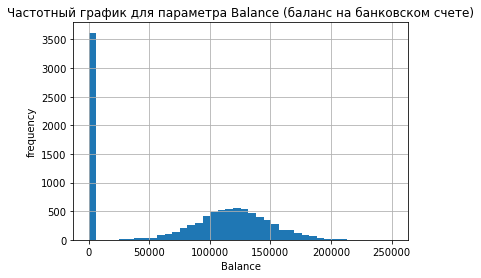

In [14]:
ax = data.Balance.hist(bins=40)

ax.set_xlabel('Balance')
ax.set_ylabel('frequency')
ax.set_title('Частотный график для параметра Balance (баланс на банковском счете)')
plt.grid(True)
plt.show()

The clients with positive balance show the normal distribution but there is a caveat. I can't clean all clients with a zero on accounts, so I'm going to do this way: share the dataset on two grouos (clients with a zero balance and plus) and take the logarithm of plus numbers, just to simplify calculations.
<font color='grey'>

Клиенты с ненулевым балансом показывают нормальное распределение, но есть одно но. Мы не можем убрать нулевых клиентов, поступим следующим образом: разделим датасет на клиентов с нулевым балансом и ненулевым и возьмем логарифм от положительного баланса, для более простых вычислений.
     </font> 

In [15]:
plus_balance = data[ data.Balance > 0 ]
plus_balance.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,1,1,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,2,0,29,4,115046.74,4,1,0,119346.88,1


In [16]:
plus_balance_ln = np.log(plus_balance.Balance)

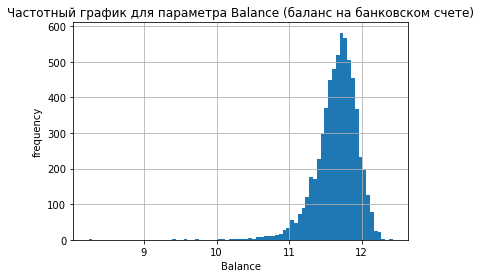

In [17]:
ax = plus_balance_ln.hist(bins=80)

ax.set_xlabel('Balance')
ax.set_ylabel('frequency')
ax.set_title('Частотный график для параметра Balance (баланс на банковском счете)')
plt.grid(True)
plt.show()

That looks like normal distribution, doesn't it?

<font color='grey'>

**Больше похоже на нормальное, не так ли?**
    </font> 

**EstimatedSalary**

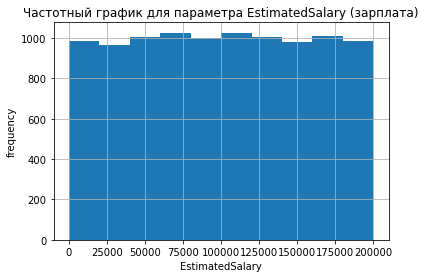

In [18]:
ax = data.EstimatedSalary.hist(bins=10)

ax.set_xlabel('EstimatedSalary')
ax.set_ylabel('frequency')
ax.set_title('Частотный график для параметра EstimatedSalary (зарплата)')
plt.grid(True)
plt.show()

That's a correlation matrix without logarithmic data.

<font color='grey'>

А пока матрица корреляции без логарифмированных данных
     </font> 

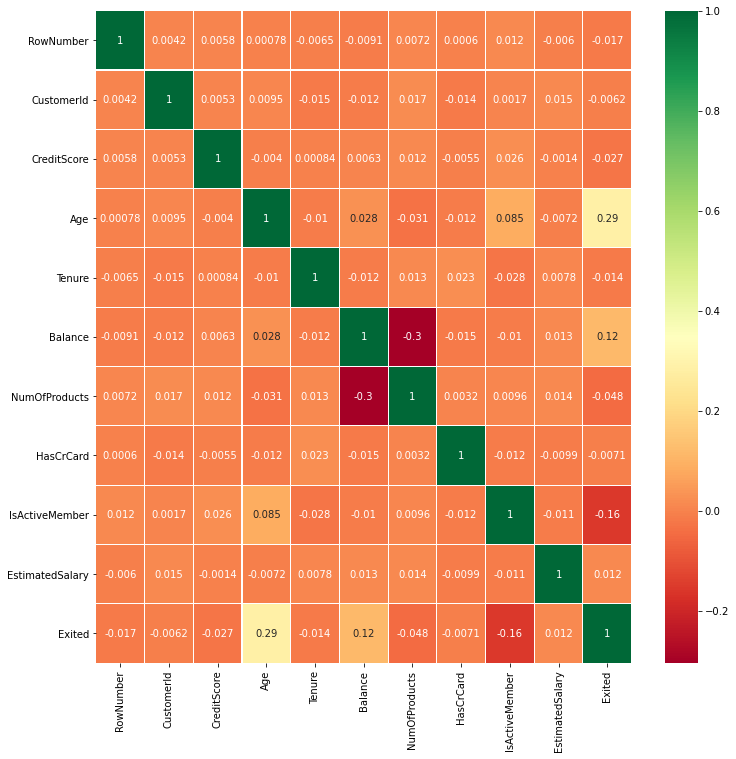

In [19]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In my opinion, there is no direct correlation. The most essential is a positive correlation between age and curn, and actually it's kind of surprise because, before that moment, I thought that older people were more conservative and didn't like change any habits.
So, let's start the plan - to share the dataset on positive and zero balance.

<font color='grey'>

    
На мой взгляд сильной корреляции нет. Наиболее существенно - положительная корреляция между возрастом и оттоком, и вот это для меня удивительно, до этого момента мне казалось, что чем старше люди, тем реже они меняют свои привычки.
А теперь осуществим задуманное. Делим весь датасет на положительный и нулевой баланс.
     </font> 

In [20]:
minus_balance = data[ data.Balance <= 0 ]
minus_balance.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.0,1,1,1,101348.88,1
3,4,15701354,Boni,699,0,0,39,1,0.0,2,0,0,93826.63,0
6,7,15592531,Bartlett,822,0,1,50,7,0.0,2,1,1,10062.80,0
11,12,15737173,Andrews,497,1,1,24,3,0.0,2,1,0,76390.01,0
12,13,15632264,Kay,476,0,0,34,10,0.0,2,1,0,26260.98,0


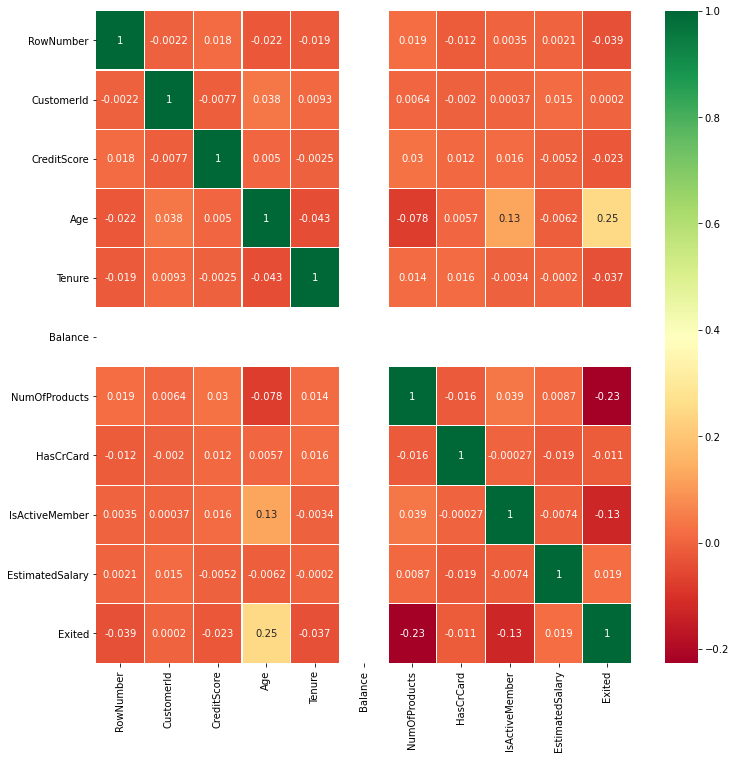

In [21]:
import seaborn as sns
sns.heatmap(minus_balance.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

The correlation of indicators of clients with zero balance doesn't look better. So look what will happen with plus balance.

<font color='grey'>

Ситуация с корреляцией не улучшилась (а даже наоборот), посмотрим, что будет при положительном балансе.
     </font> 

In [22]:
plus_balance.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,1,1,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,2,0,29,4,115046.74,4,1,0,119346.88,1


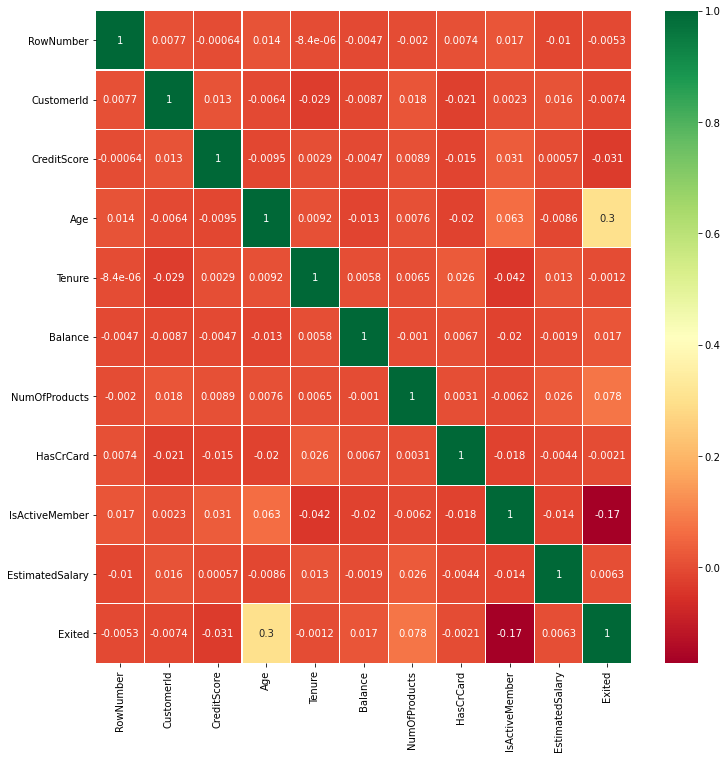

In [23]:
import seaborn as sns
sns.heatmap(plus_balance.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

The rate between age and churn rose a little. The next step is to replace balance and estimated salary on logarithm.


<font color='grey'>

Коэффициент корреляция между возрастом и маркером оттока немного вырос.
Заменим в нашем датасет значения баланса и зарплаты на логарифм.
     </font> 

In [24]:
plus_balance.Balance = np.log(plus_balance.Balance)
plus_balance.EstimatedSalary = np.log(plus_balance.EstimatedSalary)
plus_balance.head()

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,1,0,41,1,11.336282,1,0,1,11.631087,0
2,3,15619304,Onio,502,0,0,42,8,11.980807,3,1,0,11.643353,1
4,5,15737888,Mitchell,850,1,0,43,2,11.740147,1,1,1,11.278267,0
5,6,15574012,Chu,645,1,1,44,8,11.641809,2,1,0,11.916767,1
7,8,15656148,Obinna,376,2,0,29,4,11.653094,4,1,0,11.689789,1


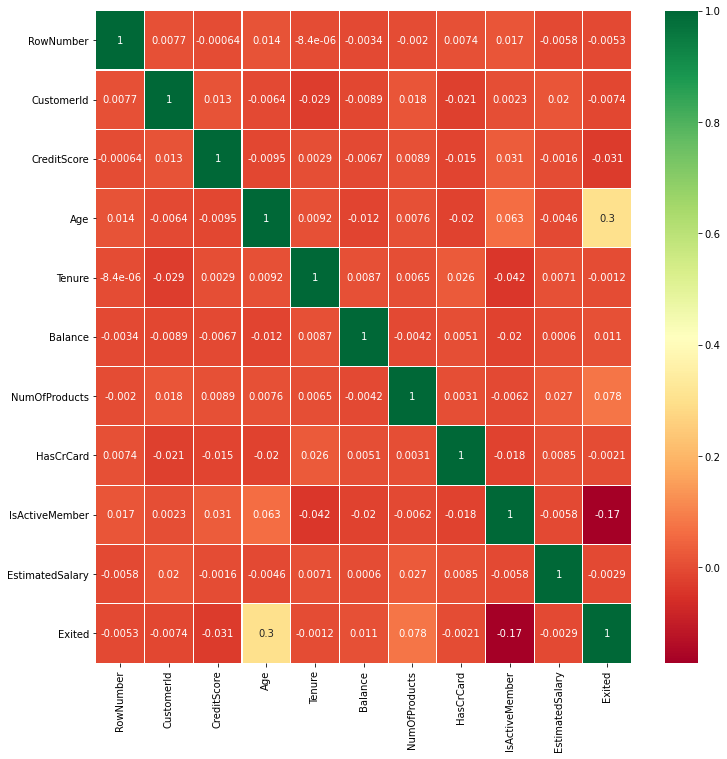

In [25]:
import seaborn as sns
sns.heatmap(plus_balance.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Even with logs the picture didn't change but we can try to "learn" data (dataset with logs of positive balance and dropped columns of name, id). I'm going to use a few options.
<font color='grey'>

Даже с учетом логарифмирования ситуация не изменилась. Но попробуем все-таки "научить" данные. Использовать я буду несколько вариантов. Учиться будем на данных с положительным балансом после логарифмирования, но дропнем колонку с именем, айди и порядковым номером.
     </font> 

In [26]:
plus_balance = plus_balance.drop(plus_balance.columns[[0, 1, 2]], axis=1)

In [27]:
plus_balance.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,1,0,41,1,11.336282,1,0,1,11.631087,0
2,502,0,0,42,8,11.980807,3,1,0,11.643353,1
4,850,1,0,43,2,11.740147,1,1,1,11.278267,0
5,645,1,1,44,8,11.641809,2,1,0,11.916767,1
7,376,2,0,29,4,11.653094,4,1,0,11.689789,1



## Random Forest. ## 

There is two variants of this model:

1) basic (based on RF algorithm)

2) the same model with dimesionality reduction by principal component analysis (RF + PCA)

There are two parts of data: 80% training and 20% of verification. Stratify=y keeps the same ratio in training and verification data as in the source.





<font color='grey'>    
    
Будет два варианта этой модели:

1) базовая, основанная на алгоритме RF

2) та же модель, что и №1, но такая, в которой применяется уменьшение размерности пространства признаков с помощью метода главных компонент (RF + PCA).


Разделим набор на две части — 80% — учебные данные и 20% — проверочные. Мы устанавливаем stratify=y для обеспечения того, чтобы и в учебном, и в проверочном наборах данных присутствовало бы то же соотношение 0 и 1, что и в исходном наборе данных. Значение stratify, как я поняла, берется любое.
     </font> 

In [28]:
from sklearn.model_selection import train_test_split
X = plus_balance.drop('Exited', axis=1)  #логично, что нужно из датасета убрать то, что мы пытаемся предсказать#
y = plus_balance['Exited'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state = 2021, stratify=y)

There is a necessity of data centering and standardization by scaling. The scaling is requested because dataset has different units of measure.
<font color='grey'>

Прежде чем приступать к моделированию, нужно выполнить «центровку» и «стандартизацию» данных путём их масштабирования. Масштабирование выполняется из-за того, что разные величины выражены в разных единицах измерения. 
     </font> 

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

 ## Basic model##
    
 There is only Random Forest algorithm. That uses all features. First step - the model initialization. The second - training on scaled data. The model accuracy can be measured by verification data.

<font color='grey'>
    
  ## Базовая модель##
    
   В ней применяется только алгоритм Random Forest. Она использует все признаки и настроена с использованием значений, задаваемых по умолчанию. Сначала инициализируем модель. После этого обучим её на масштабированных данных. Точность модели можно измерить на учебных данных:
</font> 

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

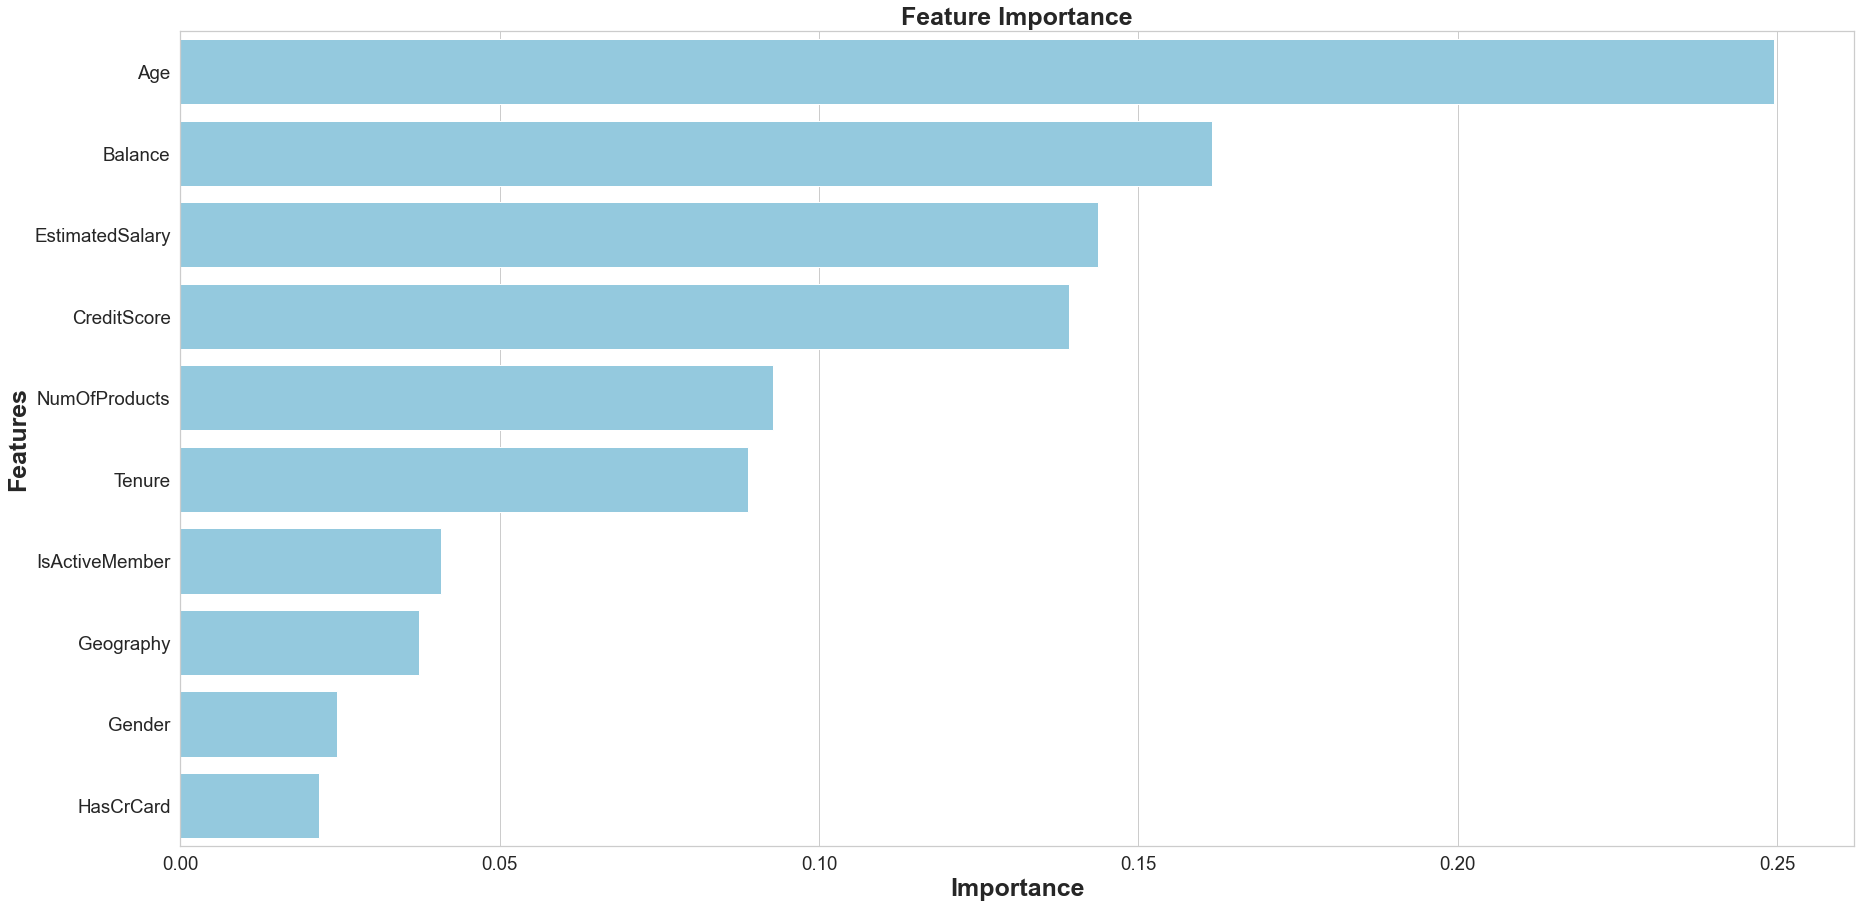

None

,Features,Gini-Importance
0,Age,0.249580
1,Balance,0.161488
2,EstimatedSalary,0.143652
3,CreditScore,0.139135
4,NumOfProducts,0.092872
5,Tenure,0.088820
6,IsActiveMember,0.040754
7,Geography,0.037378
8,Gender,0.024592
9,HasCrCard,0.021728


In [31]:
feats = {}
for feature, importance in zip(plus_balance.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

There are 10 features, How many of then influence on churn? For answer we have the principal component analysis.

<font color='grey'>

У нас 10 характеристик в датасете, а сколько из них действительно влияют на отток? Для этого есть метод главных компонент.
     </font> 

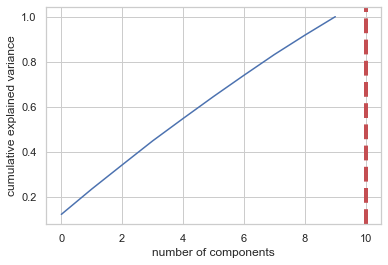

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.122962,0.122962
1,0.235435,0.112473
2,0.342580,0.107145
3,0.449019,0.106439
4,0.548318,0.099299
5,0.645902,0.097584
6,0.740134,0.094233
7,0.832236,0.092102
8,0.917903,0.085667
9,1.000000,0.082097


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=10) #у нас же 10 характеристик#
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

The final result is surprising. I thought that accuracy after 5th component wouldn't change but no, everything is important. That means I don't need to apply principal component analysis and refuse sampling. If we had a dataset with 30 components, we would refuse numbers of components instead of capacity increase.
<font color='grey'>

Честно сказать, меня получившаяся картинка удивила. Я до нее думала, что после 5 компонентов точность предсказания не особо изменяется, но нет, важно все. А это означает, что нет смысла применять метод главных компонент и сокращать выборку. Но если бы у нас датасет состоял из 30 компонентов, то вместо того, чтобы задействовать большое кол-во мощностей, можно сократить кол-во компонентов. Давайте посмотрим, что получилось в итоге.
     </font> 

In [33]:
y_pred = rfc.predict(X_test_scaled)

In [34]:
from sklearn.metrics import confusion_matrix
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

display(conf_matrix_baseline)
display('Baseline Random Forest recall score', recall_score(y_test, y_pred))

,predicted 0,predicted 1
actual 0,3666,211
actual 1,656,574


'Baseline Random Forest recall score'

0.4666666666666667

Explanation. Verification data has 1230 clients, model found 574. Accuracy is 46,7 (not good at all). What if I take the first dataset (without any preparations) and do the same?

<font color='grey'>
    А теперь пояснение. В проверочном наборе было 1230 клиентов оттока, модель нашла 574. Общая точность 46,7% - не очень хороший результат.
    А если взять самый первый датасет и сделать с ним все то же самое?
     </font> 

In [35]:
data = data.drop(data.columns[[0, 1, 2]], axis=1)

In [36]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [37]:
# training and verification
# деление на учебные и тренировочные

X = data.drop('Exited', axis=1)  
y = data['Exited'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state = 2021, stratify=y)

In [38]:
# дscaling
# масштабирование
    
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [39]:
# model
# моделирование

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

In [40]:
y_pred_source = rfc.predict(X_test_scaled)

In [41]:
conf_matrix_source = pd.DataFrame(confusion_matrix(y_test, y_pred_source), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

display(conf_matrix_source)
display('Source Random Forest recall score', recall_score(y_test, y_pred_source))

,predicted 0,predicted 1
actual 0,6131,239
actual 1,886,744


'Source Random Forest recall score'

0.456441717791411

Okey, the data preparation improves the prediction by 1 percent.

<font color='grey'>
Ну что ж, наша обработка данных позволила улучшить прогноз на 1 процент.
     </font> 